# 1 Regression Methods

## 1.1 Processing stock price data in Python

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from datetime import datetime

# Set path for generated figures
fig_path = './figures_1.1/'

<a id='1.1.1'></a>
### 1.1.1 Natural-Log Transform

We store the data in a pandas data frame setting a `datetime` index and dropping the `NaN` values. We then perform the natural-log transform of the price.

In [2]:
# Read price data
mydateparser = lambda x: datetime.strptime(x, "%d/%m/%Y")
px = pd.read_csv("priceData.csv", index_col='date', parse_dates=True, date_parser=mydateparser)
px.dropna(inplace=True)

logpx = np.log(px)

We have the time series plot for the price of the SPX Index (between 1930-2017) together with the plot of its natural-log transform in the figure below. Log transformation is often considered to stabilize the variance of a time series. It also compresses the range of the data, making it easier to see relevant trends and making the data easier to process.

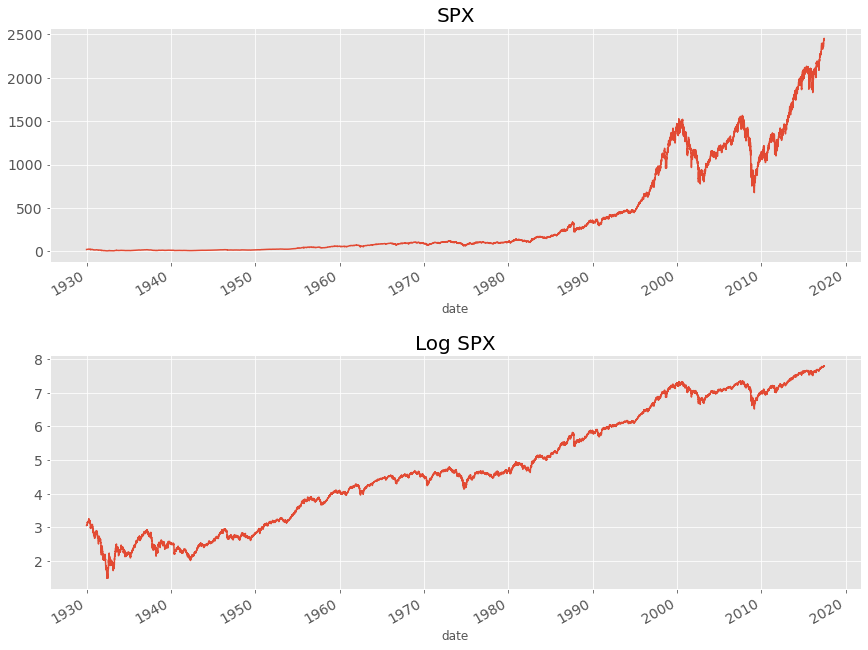

In [3]:
fig, axes = plt.subplots(2,1, figsize=(12,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

px.plot   (ax=axes[0], fontsize=14, legend=None); axes[0].set_title("SPX"    , fontsize=20)
logpx.plot(ax=axes[1], fontsize=14, legend=None); axes[1].set_title("Log SPX", fontsize=20)

fig.savefig(fig_path+'SPX_and_LogSPX.eps', dpi=200, bbox_inches='tight')

<a id='1.1.2'></a>
### 1.1.2 Stationarity

A stochastic signal is referred to be wide-sense stationary (WSS), if the mean of the signal is time invariant and its autocorrelation function only depends on the time difference, i.e.

\begin{align*}
    m_x(t) &= m_x(t+T), \text{ for any $T$}, \\
    R_{xx}(t_1, t_2) &= R_{xx}(t_2 - t_1), \text{ for any $t_1, t_2$}.
\end{align*}

Wide-sense stationarity for a signal then means that the average of the signal persists over time and its autocorrelation only depends on the time difference. This justifies the fundamental behind the investment strategy that is based on the mean-reverting behaviour of a signal.

Assuming there are 252 trading days in a year, we use a sliding window of 252 days to compute the first and second-order evolution statistics (mean and standard deviation) of the price and log-price time series. Overall, the sliding mean, representing the moving average, smoothens the signal, while the sliding standard deviation represents the volatility of the signal over the past year.

We observe that the moving average of price and log-price aren't stationary and upward trending. The trend for the log-price time series particularly can be viewed to be steadily increasing at a somewhat constant rate.

We also observe the previously mentioned effect of the log transformation in stabilizing the variance. We see, in bottom right, that the 252-day rolling standard deviation of the log-price data is somewhat stationary, oscillating between 0 and 0.15 with an average value of 0.068, while the standard deviation of the price is quite unsteady.

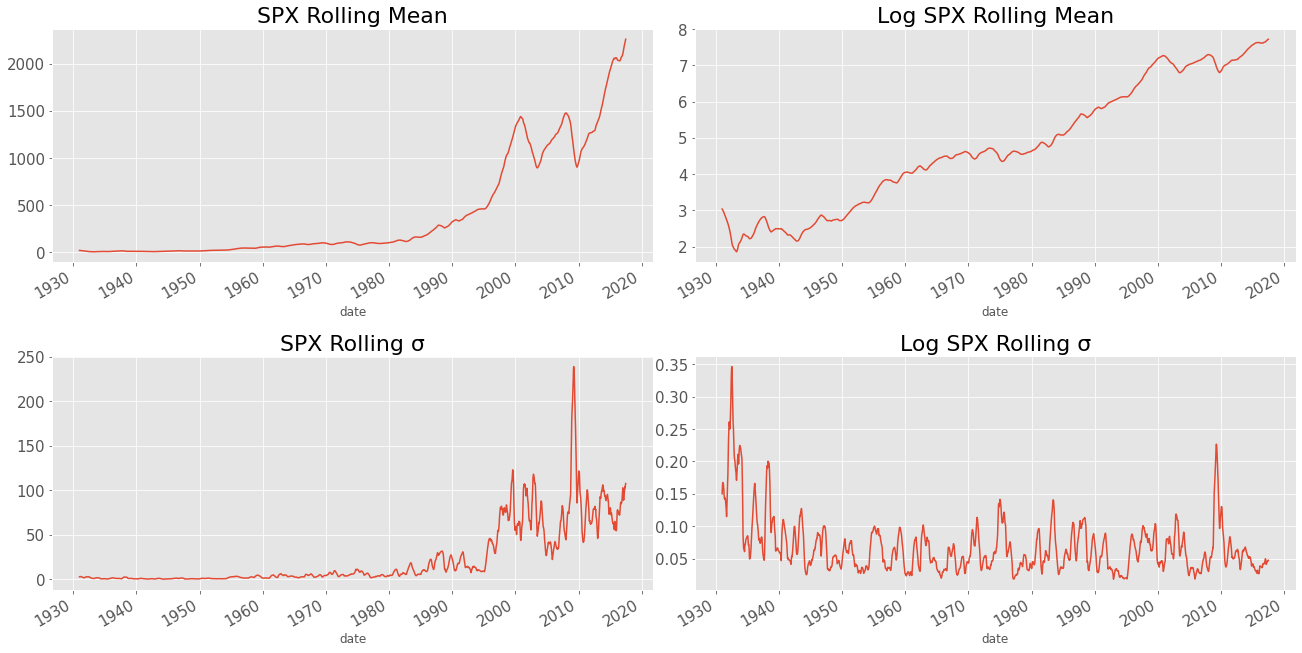

In [4]:
window = 252

fig, axes = plt.subplots(2,2, figsize=(18,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

# Plot rolling statistics of price
px.rolling(window).mean().plot(ax=axes[0,0], fontsize=15, legend=None); axes[0,0].set_title("SPX Rolling Mean", fontsize=22)
px.rolling(window).std().plot(ax=axes[1,0], fontsize=15, legend=None); axes[1,0].set_title("SPX Rolling \u03C3", fontsize=22)

# Plot rolling statistics of log price
logpx.rolling(window).mean().plot(ax=axes[0,1], fontsize=15, legend=None); axes[0,1].set_title("Log SPX Rolling Mean", fontsize=22)
logpx.rolling(window).std().plot(ax=axes[1,1], fontsize=15, legend=None); axes[1,1].set_title("Log SPX Rolling \u03C3", fontsize=22)

fig.savefig(fig_path+'Rolling_Means_And_Stds.eps', dpi=200, bbox_inches='tight')

In [5]:
# Average value of Log SPX rolling std
print(logpx.rolling(window).std().mean())

SPX Index    0.067923
dtype: float64


<a id='1.1.3'></a>
### 1.1.3 Simple and Log Returns

We have seen in part [1.1.2](#1.1.2) that the time series for price and log-price was not stationary (although the rolling $\sigma$ of Log SPX was somewhat stationary). However, it is often preferable to deal with stationary signals in financial analysis. Therefore, we look into return characteristics of the signal, which are better in terms of stationarity. 

The simple return, $R$, is defined as the percentage increase of the price at each time step, i.e.,

\begin{equation}
    R_t = \frac{p_t - p_{t - 1}}{p_{t - 1}} = \frac{p_t}{p_{t - 1}} - 1,
\end{equation}

while the log return, $r$ is defined as the difference between the successive log values of the price, i.e.,

\begin{equation}
    r_t = \ln \left(\frac{p_t}{p_{t - 1}}\right) = \ln(p_t) - \ln(p_{t-1}).
\end{equation}

We have in the figure below the plots of the statistics for the simple and log return time series. At the first glance, juxtaposition of the plots for the simple and log returns indicates that the plots for the individual statistics are identical. Indeed, although there are very slight discrepancies, the relevant time series for simple and log returns are almost identical. This suggests the *approximate simple-log equality*, i.e. $R_t \approx r_t$, for small returns.

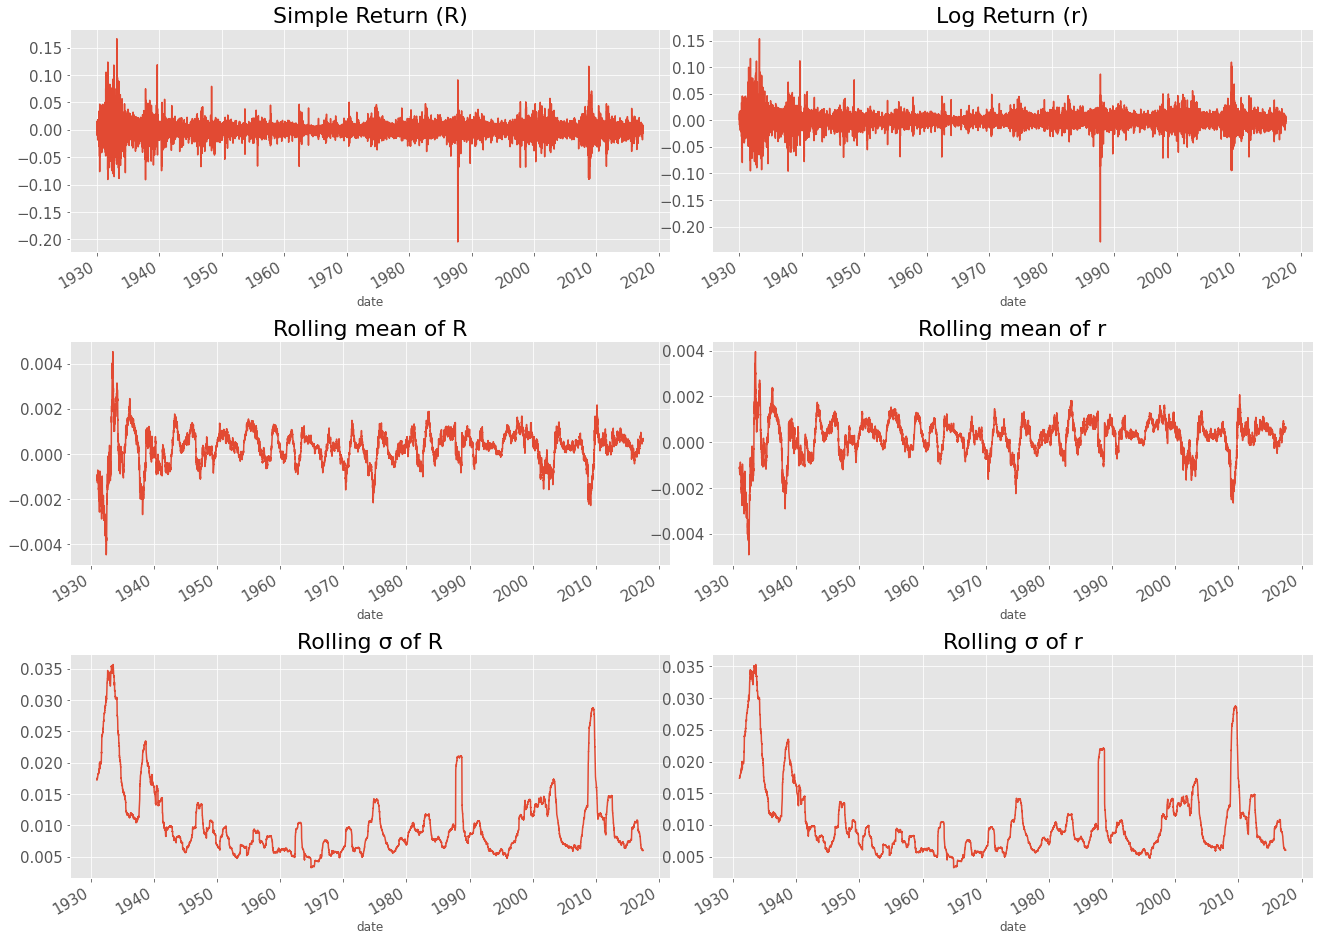

In [6]:
simpret = px.pct_change()
logret = logpx.diff() 

fig, axes = plt.subplots(3,2, figsize=(18,15))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

# Plot simple return time series and its rolling statistics
simpret.plot(ax=axes[0,0], fontsize=15, legend=None); axes[0,0].set_title("Simple Return (R)", fontsize=22)
simpret.rolling(window).mean().plot(ax=axes[1,0], fontsize=15, legend=None); axes[1,0].set_title("Rolling mean of R", fontsize=22)
simpret.rolling(window).std().plot(ax=axes[2,0], fontsize=15, legend=None); axes[2,0].set_title("Rolling \u03C3 of R", fontsize=22)

# Plot log return time series and its rolling statistics
logret.plot(ax=axes[0,1], fontsize=15, legend=None); axes[0,1].set_title("Log Return (r)", fontsize=22)
logret.rolling(window).mean().plot(ax=axes[1,1], fontsize=15, legend=None); axes[1,1].set_title("Rolling mean of r", fontsize=22)
logret.rolling(window).std().plot(ax=axes[2,1], fontsize=15, legend=None); axes[2,1].set_title("Rolling \u03C3 of r", fontsize=22)


fig.savefig(fig_path+'Simple_and_Log_Returns.eps', dpi=200, bbox_inches='tight')

<a id='1.1.4'></a>
### 1.1.4 Log returns over simple returns

We briefly argued the suitability of log transformation in previous sections, mentioning its monotonicity and that it can compress the range of the data. We also mentioned in section [1.1.3](#1.1.3) that for small returns $R_t \approx r_t$. Here, we will continue the argument on why log-returns are more convenient to analyse than simple returns. 

In quantitative finance, we often expect the prices to be log-normally distributed over short periods of time, (for longer periods, the distribution is more skewed since the market is generally upward trending). Therefore, going through the following reasoning,
\begin{equation*}
    p_t \sim \text{log-normal,} \hspace{20pt} p_{t - 1} \sim \text{log-normal} \hspace{20pt} \Rightarrow \hspace{20pt} \frac{p_t}{p_{t - 1}} \sim \text{log-normal},
\end{equation*}
\begin{equation*}
    r_t = \ln \left( \frac{p_t}{p_{t - 1}} \right) \sim \text{normal},
\end{equation*}
we can determine log returns to be normally distributed. Because many signal processing techniques assume normal distribution and because $r_t$ is conveniently normally distributed, we often prefer using log returns for analysis. See the histogram plots in the figure below to visualize the distribution of the returns.

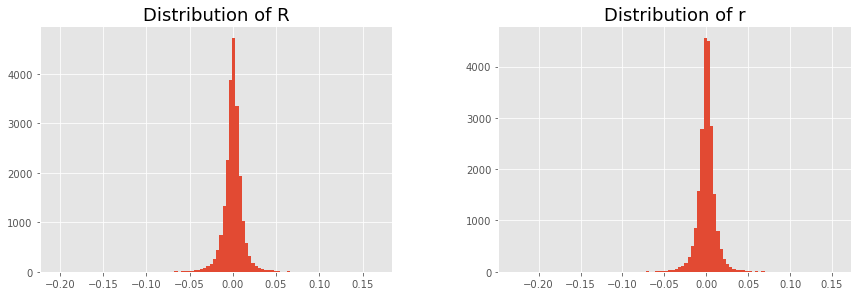

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
fig.tight_layout()

simpret.hist(ax=axes[0], bins=100); axes[0].set_title("Distribution of R", fontsize=18)
logret.hist (ax=axes[1], bins=100); axes[1].set_title("Distribution of r", fontsize=18)

fig.savefig(fig_path+'Simple_and_Log_Returns_Distribution.eps', dpi=200, bbox_inches='tight')

Another reason why we might prefer using logarithmic returns is that they provide *time additivity*, which is convenient when calculating compounded returns.  That is, if we have 1\% return one day and -1\% return the next day, we end up with the same value; this is not the case with simple returns as illustrated in equations in the following equations:

\begin{equation}\label{eq:3}
    r_t + r_{t + 1} = \ln \left( \frac{p_t}{p_{t - 1}} \right) + \ln \left( \frac{p_{t + 1}}{p_t} \right) = \ln \left( \frac{p_{t + 1}}{p_{t - 1}} \right)
\end{equation}

\begin{equation}\label{eq:4}
    R_t + R_{t + 1} = \frac{p_t}{p_{t - 1}} - 1 + \frac{p_{t + 1}}{p_t} - 1 \neq \frac{p_{t + 1}}{p_{t - 1}} - 1
\end{equation}

Due to their Gaussian distribution, *log returns are symmetric*. Also notice that the first equation above illustrates the fact that *sum of Gaussian variables are also Gaussian*, which is again handy for signal processing purposes. 

We also note the fact that logarithms and exponents allow *easier manipulation with calculus*, which is handy. Logarithms also offer *numerical stability*, as in adding small numbers don't have significant effects (however, multiplying with small numbers can have large effects).

Finally, the *know-how* of pre-processing of log(data) (homomorphic processing) from other disciplines is another advantage of using log returns. Examples include Maximum Likelihood Estimation and complex-valued Neural Networks.

There are multiple tests available that make it is possible to test a signal's Gaussianity. One of them is the "Jarque-Bera" test, which checks whether the sample data has the skewness and kurtosis matching a normal distribution and is available under `scipy.stats` module in Python. The statistic is defined by

\begin{equation}
    JB = \frac{n}{6} \left( S^2 + \frac{1}{4} (K - 3)^2\right),
\end{equation}

where n is the number of observations, S is the sample skewness, and K is the sample kurtosis. Note that a normal distribution has skewness equal to 0 and kurtosis equal to 3. Therefore, the closer the JB statistic is to 0, the closer the distribution of the sample is to a Gaussian.

In [8]:
# Since the value at the first index is NaN for both returns, we start with the second index
simp_JB = [stats.jarque_bera(simpret[1:i]) for i in range(100, len(simpret)-1, 100)]
log_JB  = [stats.jarque_bera( logret[1:i]) for i in range(100, len(logret )-1, 100)]

simp_JB_stat = [x[0] for x in simp_JB]
simp_JB_p    = [x[1] for x in simp_JB]

log_JB_stat = [x[0] for x in log_JB]
log_JB_p    = [x[1] for x in log_JB]

x = [i for i in range(100, len(simpret)-1, 100)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


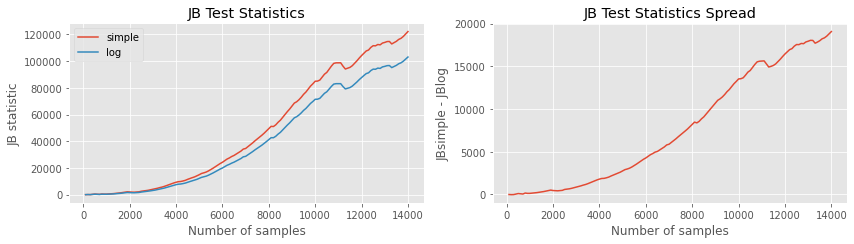

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12,3.5))

axes[0].plot(x[:140], np.array(simp_JB_stat[:140]), label="simple")
axes[0].plot(x[:140], np.array( log_JB_stat[:140]), label="log")
axes[0].set_title('JB Test Statistics')
axes[0].set_xlabel('Number of samples'); axes[0].set_ylabel('JB statistic')
axes[0].legend()

axes[1].plot(x[:140], np.array(simp_JB_stat[:140]) - np.array(log_JB_stat[:140]) )
axes[1].set_title('JB Test Statistics Spread')
axes[1].set_xlabel('Number of samples'); axes[1].set_ylabel('JBsimple - JBlog')

fig.tight_layout()

fig.savefig(fig_path+'JB_Test.eps', dpi=200, bbox_inches='tight')

In [10]:
JB_simp, p_simp = stats.jarque_bera(simpret[1:67])
JB_log , p_log  = stats.jarque_bera( logret[1:67])
print('Short-term: JB statistic for simple returns, p-value = ', JB_simp, ',', p_simp)
print('Short-term: JB statistic for log returns, p-value    = ', JB_log , ',', p_log )

Short-term: JB statistic for simple returns, p-value =  1.7477977070487296 , 0.4173212986426027
Short-term: JB statistic for log returns, p-value    =  1.8215734726963881 , 0.40220766813490383


In [11]:
JB_simp, p_simp = stats.jarque_bera(simpret[1:253])
JB_log , p_log  = stats.jarque_bera( logret[1:253])
print('Longer-term: JB statistic for simple returns, p-value = ', JB_simp, ',', p_simp)
print('Longer-term: JB statistic for log returns, p-value    = ', JB_log , ',', p_log )

Longer-term: JB statistic for simple returns, p-value =  25.87351370187126 , 2.4078968906549036e-06
Longer-term: JB statistic for log returns, p-value    =  33.82712145856474 , 4.5137126258865123e-08


In [12]:
JB_simp, p_simp = stats.jarque_bera(simpret[1:500])
JB_log , p_log  = stats.jarque_bera( logret[1:500])
print('Longer-term: JB statistic for simple returns, p-value = ', JB_simp, ',', p_simp)
print('Longer-term: JB statistic for log returns, p-value    = ', JB_log , ',', p_log )

Longer-term: JB statistic for simple returns, p-value =  449.3741655150386 , 0.0
Longer-term: JB statistic for log returns, p-value    =  339.1267534754359 , 0.0


We plot the JB statistic of simple and log returns for different number of samples on the left side in the figure above, observing that the values increase with increasing number of samples. The statistic for simple returns increases faster than that of log returns, and we plot this spread on the right side. This indicates the fact that log returns exhibit more Gaussianity than do the simple returns. In addition, both returns exhibit Gaussianity for the short-term (e.g. p-values for the JB Test of quarterly data are about 40\%), but that is not the case for the long-term.

<a id='1.1.5'></a>
### 1.1.5 Simple and log return example

In the table below we use a simple price time series to observe the evolution of simple and log returns. We observe that the price goes up from £1 to £2 and then goes back to £1. 

At the first interval the simple return is 1.00, and at the second interval it is -0.50. Even though the price at the end is equal to the one we start with (meaning 0 overall return), the addition of simple returns is positive. This indicates that the simple return is not time additive.

At the first interval the log return is 0.693, and at the second interval it is -0.693, their sum equaling to 0. This indicates the previously mentioned *time additivity* of log returns, i.e. if you gain x\% one day and lose x\% the next day, you end up with the same value.

Time additivity provides computational advantages in the analysis of financial data. See section [1.1.4](#1.1.4) for detail on the advantages of using log returns.

| **Day**           | **0** | **1** | **2** |
| -------           | ----- | ----- | ----- |
| **price**         | 1     | 2     | 1     |
| **log price**     | 0     | 0.693 | 0     |
| **simple return** | NA    | 1     | -0.5  |
| **log return**    | NA    | 0.693 | -0.693|

<a id='1.1.6'></a>
### 1.1.6 When not to use log returns

We mentioned in section [1.1.4](#1.1.4) that we assume the prices to be log-normally distributed over short periods of time. However, this assumption does not hold over long time scales: log-normal distributions are positively skewed, but often financial data are negatively skewed in long time scales due to financial crashes. Therefore, we should not use logarithmic returns when doing long-term analysis. Furthermore, when calculating the overall return of a portfolio, it is more convenient to use simple returns because they are linearly additive across assets, whereas logarithmic returns are not.